<a href="https://colab.research.google.com/github/AdemilsonMiguel/Iniciando-em-Data-Science/blob/main/Previs%C3%A3o_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importando Bibliotecas

In [61]:
#Manipulação de Biblioteca
import pandas as pd

#Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#Avaliando Modelos
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Entrada do arquivo no formato CSV

In [2]:
df = pd.read_csv("/content/advertising.csv")

#### Primeira Inspeção

In [3]:
df.head(10)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df.tail(5)

,TV,Radio,Jornal,Vendas
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

#### Informações Estatísticas

In [7]:
df.describe().round(2)

,TV,Radio,Jornal,Vendas
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


#### Visualização de Dados

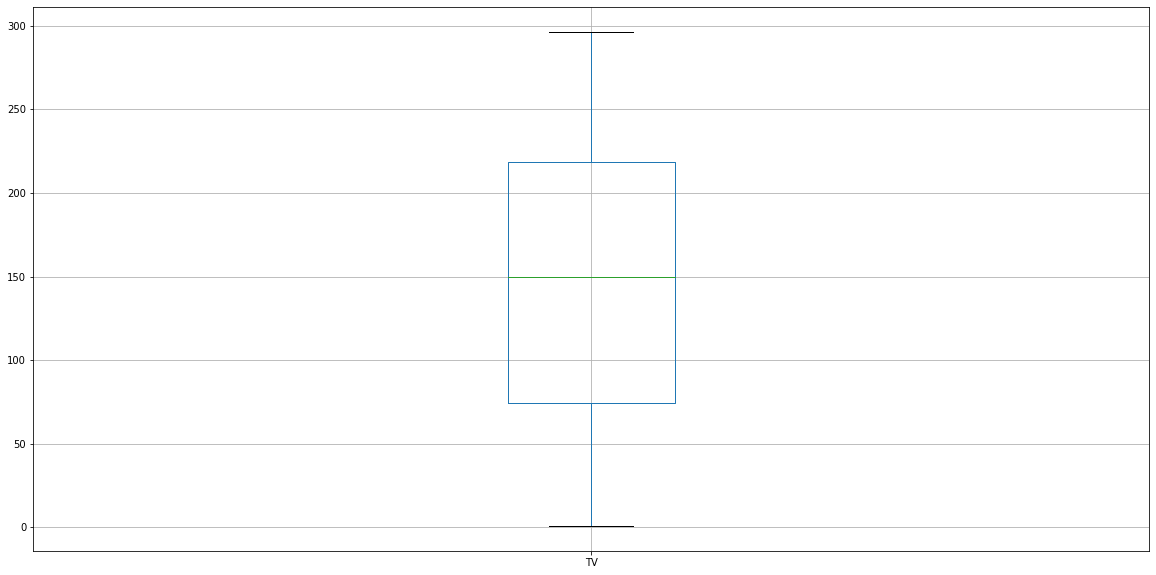

In [8]:
plt.figure(figsize=(20,10))
df.boxplot("TV")
plt.show()

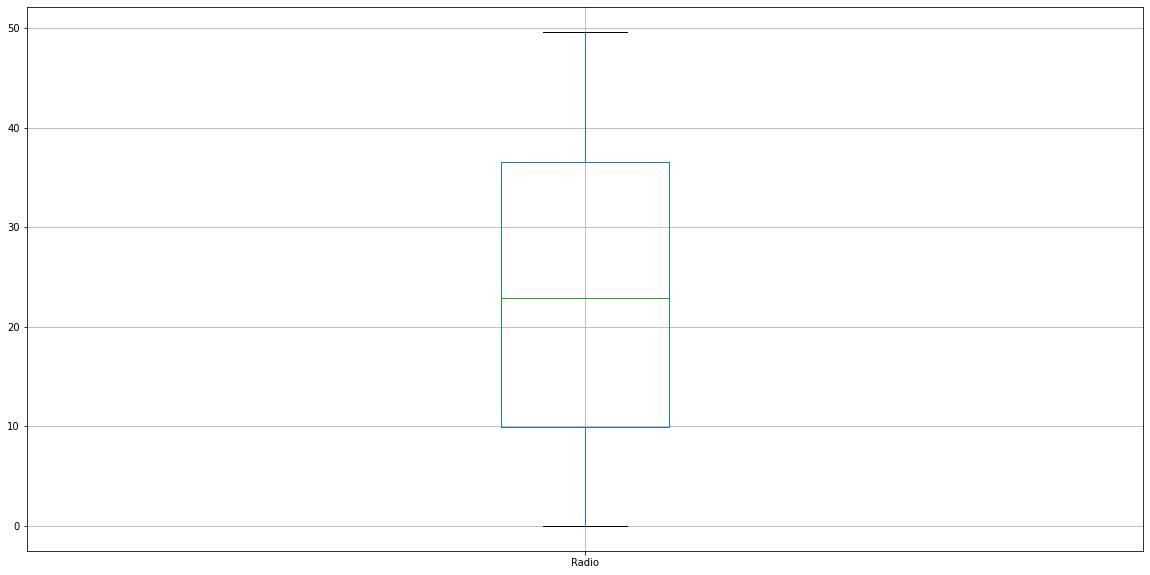

In [9]:
plt.figure(figsize=(20,10))
df.boxplot("Radio")
plt.show()

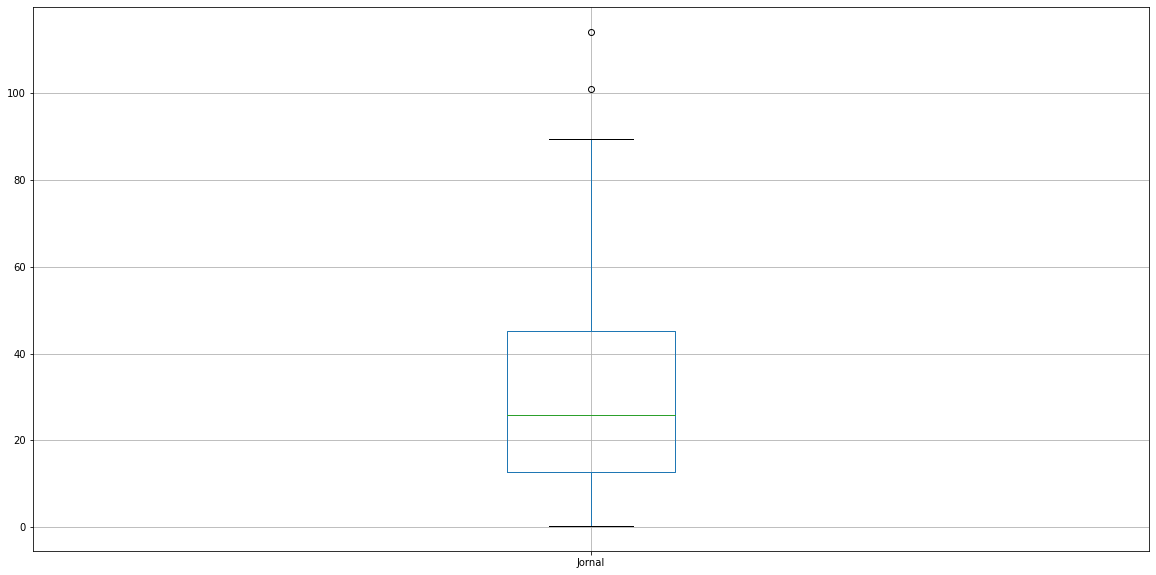

In [11]:
plt.figure(figsize=(20,10))
df.boxplot("Jornal")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


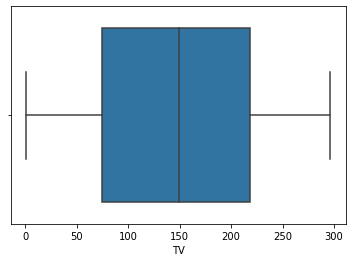

In [12]:
sns.boxplot(df["TV"])
plt.show()

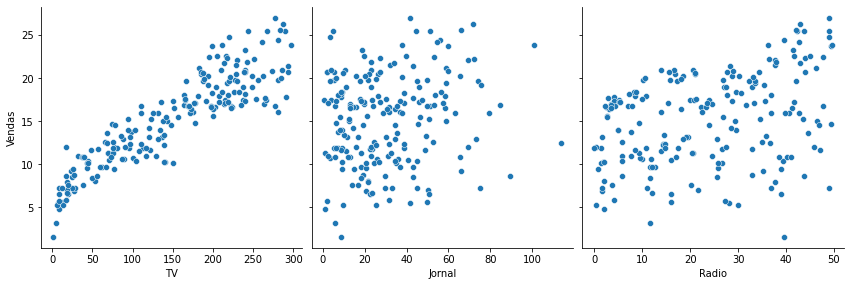

In [13]:
sns.pairplot(df, x_vars=['TV', 'Jornal', 'Radio'], y_vars='Vendas', height=4, aspect=1, kind='scatter')
plt.show()

#### Correlação entre as variáveis

In [14]:
df.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


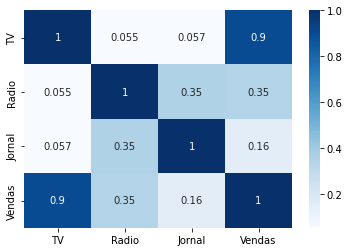

In [15]:
sns.heatmap(df.corr(), cmap="Blues", annot=True)

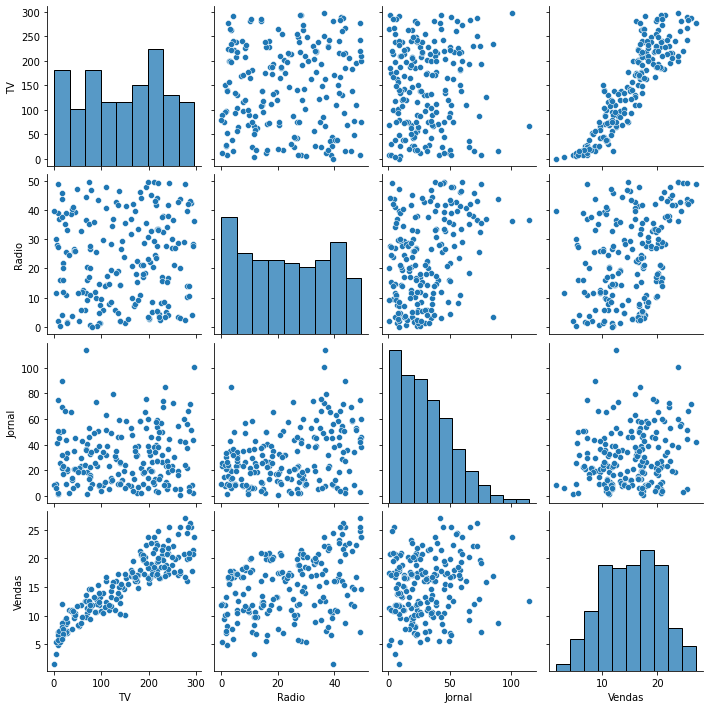

In [16]:
sns.pairplot(df)

#### Implementação do Modelo de Machine Learning

In [42]:
X = df[['TV']]
y = df[['Vendas']]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [44]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [45]:
X_train.shape

(140, 1)

In [46]:
X_test.shape

(60, 1)

In [47]:
y_train.shape

(140, 1)

In [48]:
y_test.shape

(60, 1)

In [49]:
X_train_sm = sm.add_constant(X_train)

In [50]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [51]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [52]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [53]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.52e-52
Time:                        18:36:49   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

####Scikit-learn

In [54]:
lr = LinearRegression()

In [55]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lr.coef_

array([[0.05454575]])

In [58]:
lr.intercept_

array([6.9486832])

In [59]:
pred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


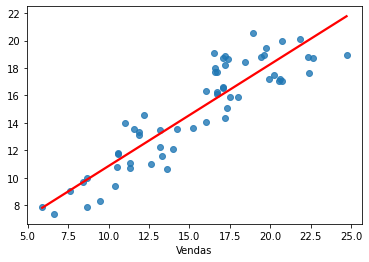

In [60]:
sns.regplot(y_test, pred, line_kws={'color': 'red'}, ci=None)

#### Avaliação

In [62]:
r2 = r2_score(y_test, pred)

In [63]:
r2

0.7921031601245662

In [64]:
mse = mean_squared_error(y_test, pred)

In [65]:
mse

4.077556371826948

#### Predição

In [68]:
valor_tv = float(input('Qual valor será gasto na TV: '))

Qual valor será gasto na TV: 338


In [69]:
lr.predict([[valor_tv]])

array([[25.38514769]])

In [71]:
df.head(15)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6
